In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load the dataset

In [53]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Price'] = housing.target

In [54]:
# Basic Analysis

## Dataset Info

In [55]:
print("\n=== Basic Dataset Information ===")
print(df.info())

print("\n=== First 5 rows of the dataset ===")
print(df.head())

print("\n=== Dataset shape ===")
print("Number of rows and columns:", df.shape)

print("\n=== Column names ===")
print("Columns:", df.columns.tolist())

print("\n=== Basic statistics ===")
print(df.describe())

print("\n=== Check for missing values ===")
print(df.isnull().sum())


=== Basic Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

=== First 5 rows of the dataset ===
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0 

## Correlation Matrix

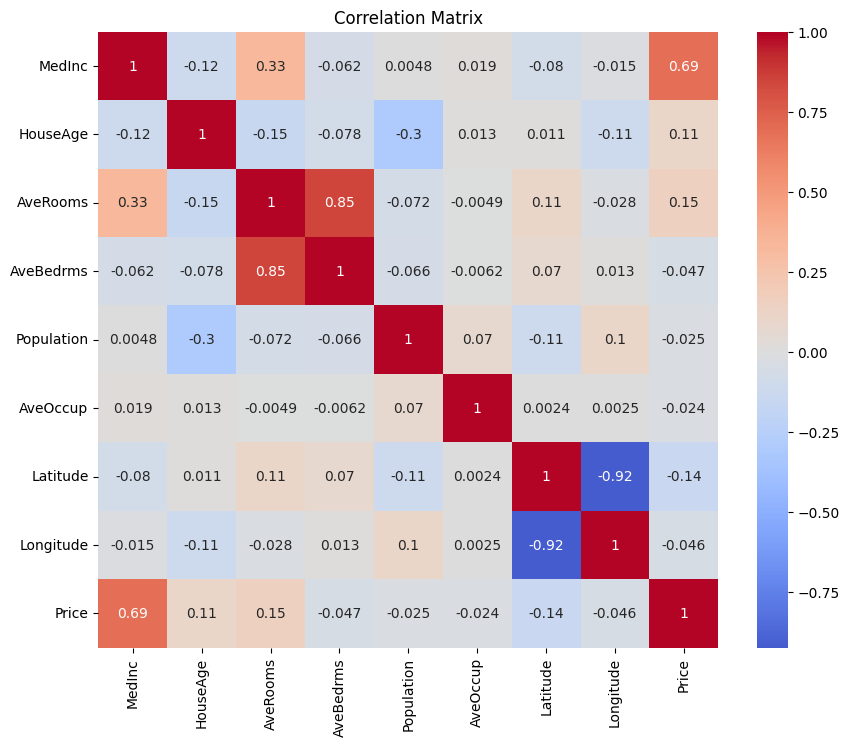

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Distribution of the target var (Price)

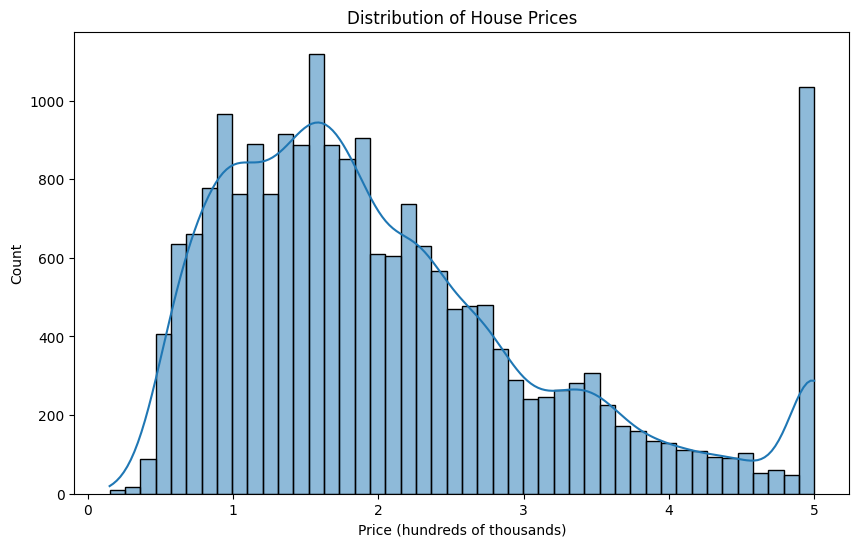

In [57]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], kde = True)
plt.title('Distribution of House Prices')
plt.xlabel('Price (hundreds of thousands)')
plt.show()


## Box plots of the features

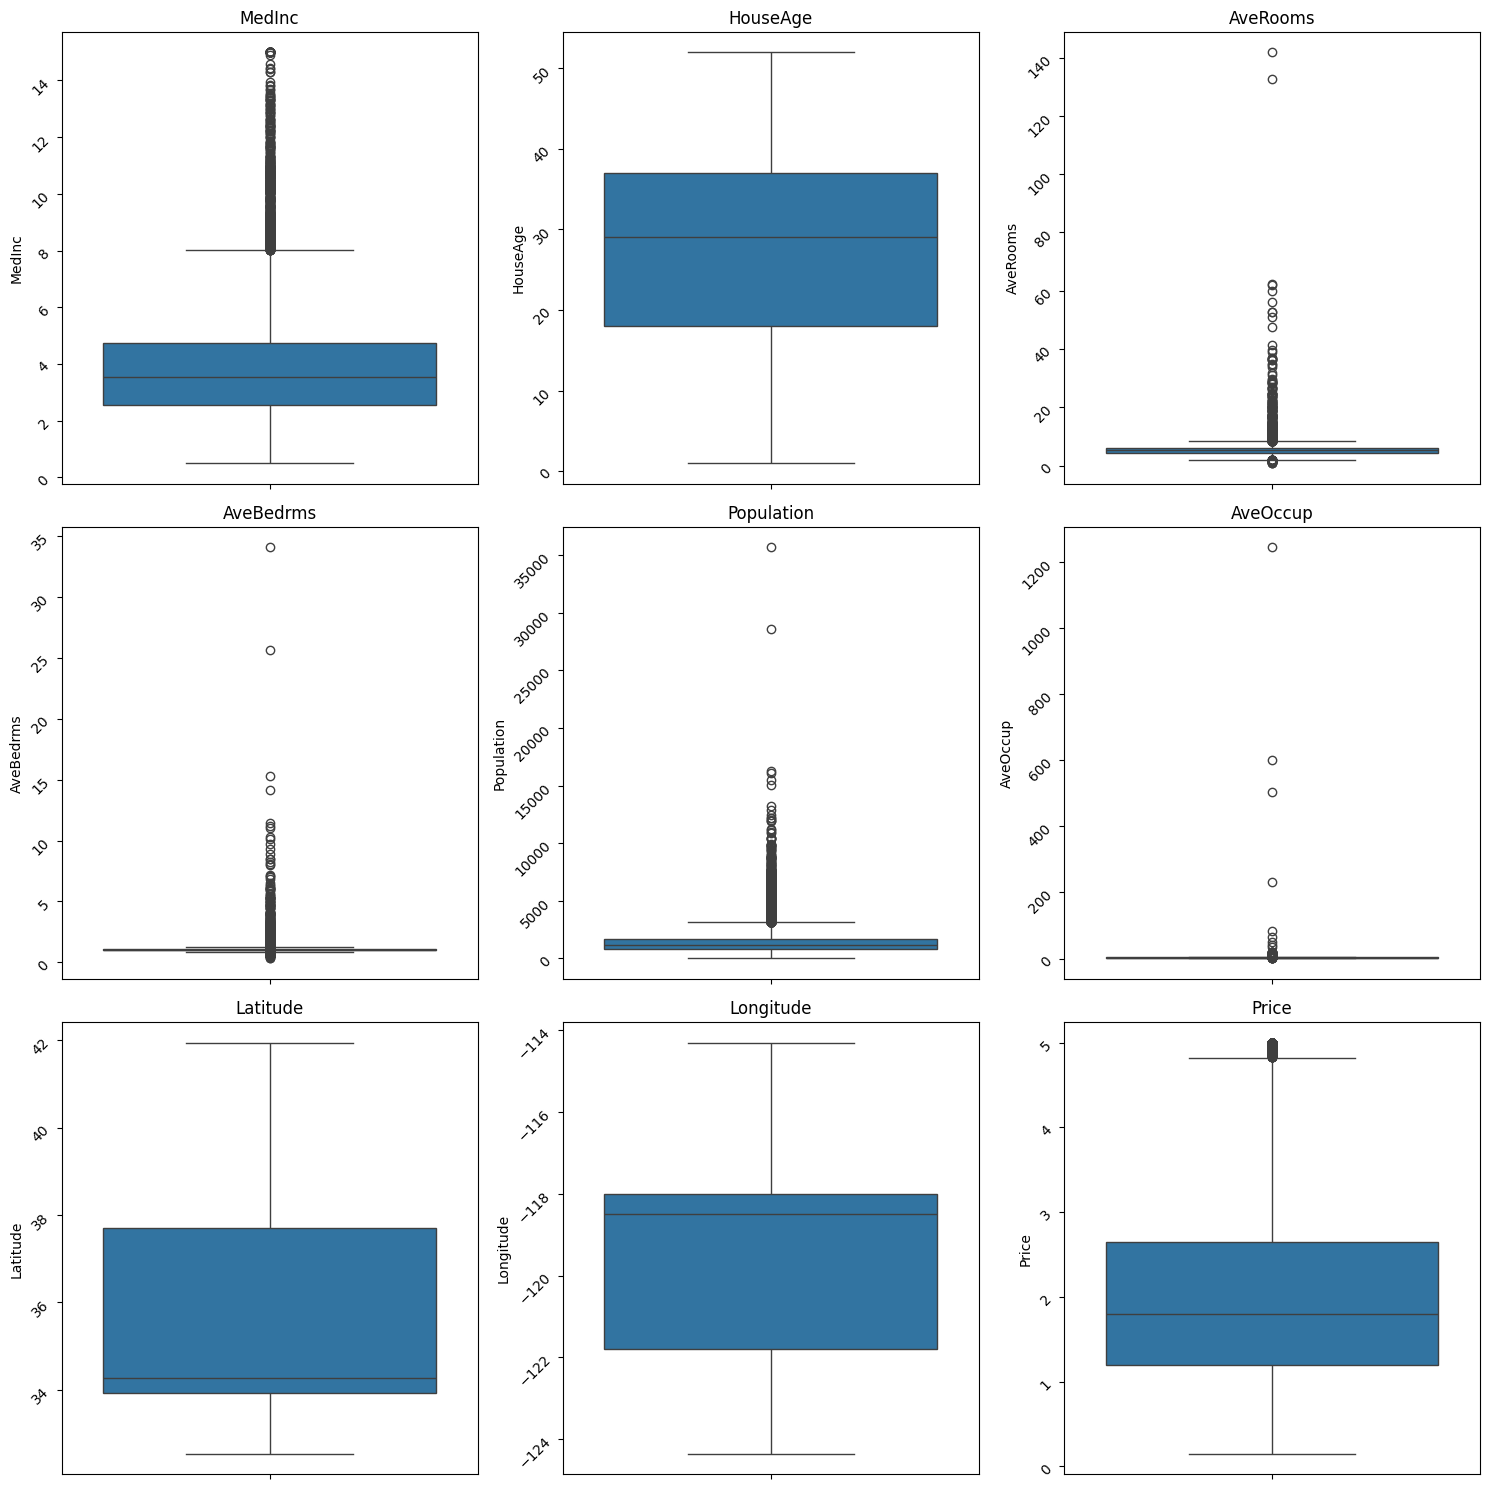

In [58]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel() # Flatten the 2D array of axes

for idx, column in enumerate(df.columns):
    sns.boxplot(data=df[column], ax=axes[idx])
    axes[idx].set_title(column)
    axes[idx].tick_params(rotation=45)

plt.tight_layout()
plt.show()

# Use median income as a feature

In [59]:
X = df['MedInc']
y = df['Price']

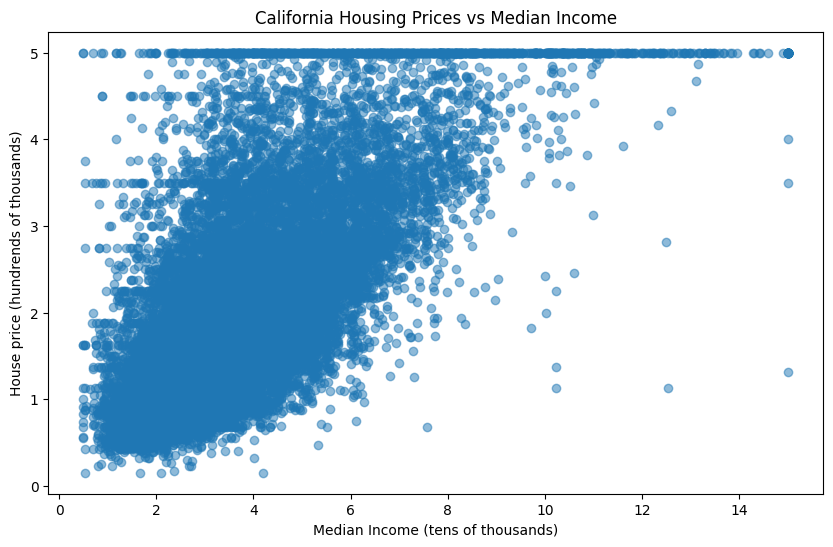

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,alpha=0.5)
plt.xlabel("Median Income (tens of thousands)")
plt.ylabel("House price (hundrends of thousands)")
plt.title("California Housing Prices vs Median Income")
plt.show()

# Scale the features

In [68]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values.reshape(-1,1))
y_scaled = scaler.fit_transform(y.values.reshape(-1,1))

# Cost Function

The cost function (Mean Squared Error) is defined as:

$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$

where:
- $m$ is the number of training examples
- $h_\theta(x)$ is the hypothesis function: $h_\theta(x) = \theta_0 + \theta_1x$
- $x^{(i)}$ is the i-th input feature
- $y^{(i)}$ is the i-th output value

we're trying to minimize this cost function


In [62]:
def compute_cost(X,y,theta):
    m = len(y)
    predictions = X*theta[1] + theta[0]
    return (1/(2*m)) * np.sum((predictions-y)**2)

# Gradient descent
This is to minimize the const function and update θ₀ and θ₁ until convergence

$$\theta_0 := \theta_0 - \alpha \frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)$$

$$\theta_1 := \theta_1 - \alpha \frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1)$$

where:
- $\alpha$ is the learning rate
- $\frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$ is the partial derivative of the cost function with respect to parameter $\theta_j$
- The partial derivatives expand to:
  - $\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})$
  - $\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x^{(i)}$

   where:
  - $m$ is the number of training examples
  - $h_\theta(x)$ is the hypothesis function: $h_\theta(x) = \theta_0 + \theta_1x$
  - $:=$ denotes parameter update


In [63]:
def gradient_descent(X,y,theta,alpha,iterations):
    m = len(y)
    cost_history = []
    theta_history = []

    for i in range(iterations):
        prediction = X*theta[1] + theta[0]

        #Update theta
        temp0 = theta[0] - alpha * (1/m) * np.sum(prediction-y)
        temp1 = theta[1] - alpha * (1/m) * np.sum((prediction-y)*X)

        theta = np.array([temp0,temp1])
        theta_history.append(theta)
        cost_history.append(compute_cost(X,y,theta))

    return theta,cost_history,theta_history



# Run the Gradient Descent

In [64]:
# Initialize parameters
theta = np.array([0,0])
alpha = 0.01
iterations = 1000

# Run GD

theta_final,cost_history,theta_history = gradient_descent(
    x_scaled.flatten(),
    y_scaled.flatten(),
    theta,
    alpha,
    iterations
)

# Plot the cost functions over iterations

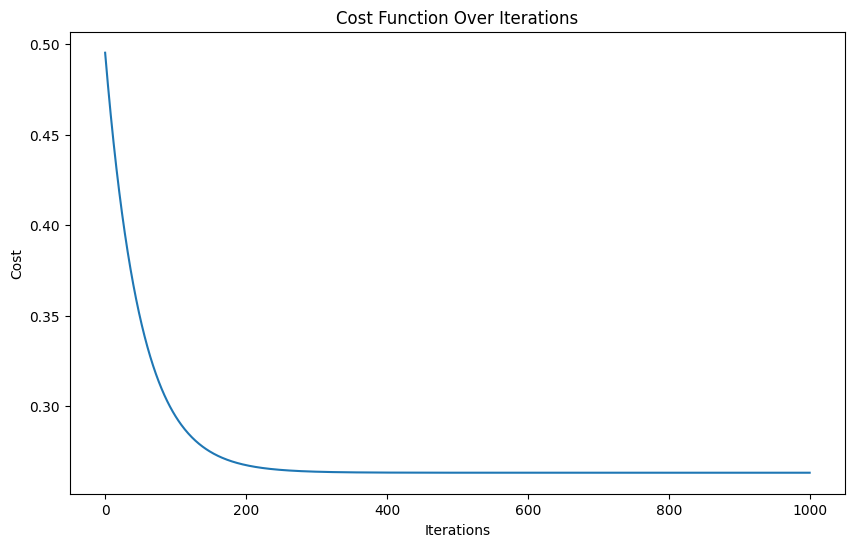

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()

# Contour Plot of the cost function

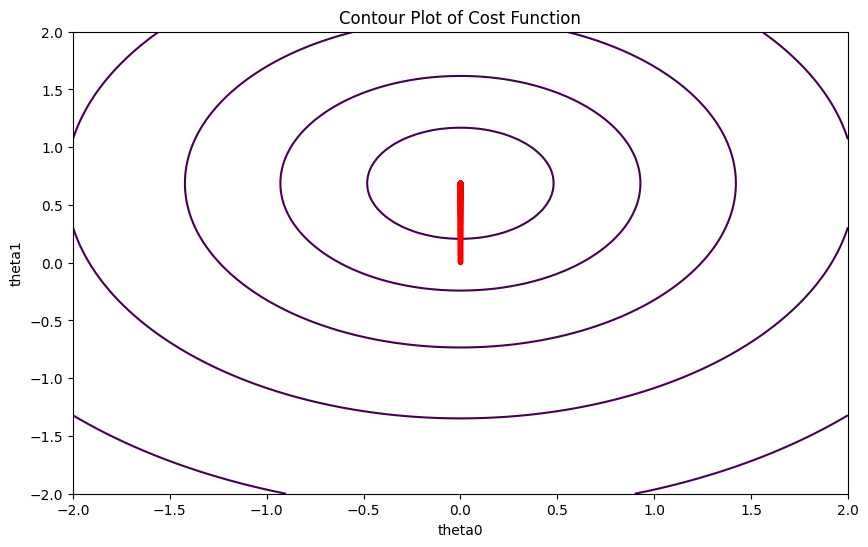

In [69]:

# Create contour plot of the cost function
theta0_vals = np.linspace(-2, 2, 100)
theta1_vals = np.linspace(-2, 2, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i,j] = compute_cost(X_scaled.flatten(), y_scaled.flatten(), t)

# Create contour plot
plt.figure(figsize=(10, 6))
plt.contour(theta0_vals, theta1_vals, J_vals.T, levels=np.logspace(-2, 3, 20))
plt.plot([t[0] for t in theta_history], [t[1] for t in theta_history], 'r.-')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Contour Plot of Cost Function')
plt.show()

## Countour plot in 3D

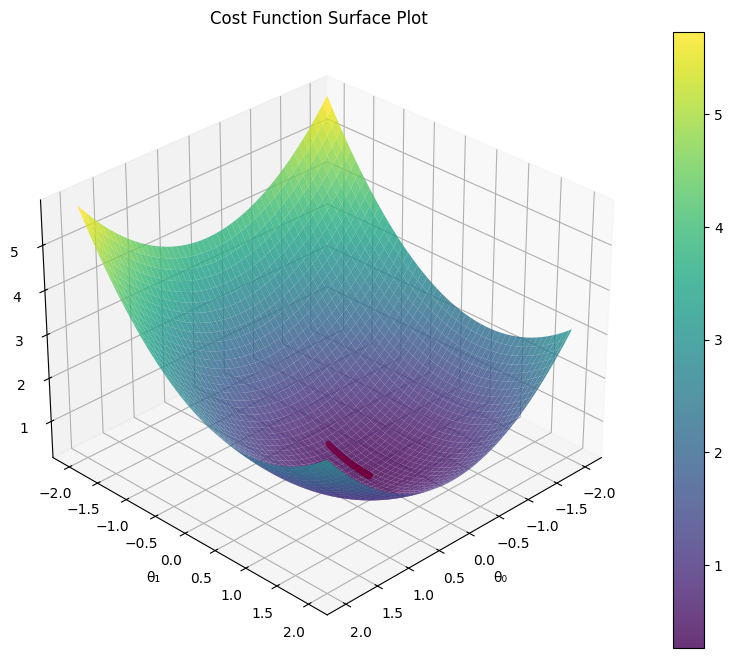

In [71]:
# Create 3D surface plot of the cost function
from mpl_toolkits.mplot3d import Axes3D

# Create the mesh grid for theta0 and theta1
theta0_vals = np.linspace(-2, 2, 100)
theta1_vals = np.linspace(-2, 2, 100)
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

# Calculate cost for each theta combination
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i,j] = compute_cost(X_scaled.flatten(), y_scaled.flatten(), t)

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(T0, T1, J_vals.T, cmap='viridis', alpha=0.8)

# Plot the path of gradient descent
theta_history = np.array(theta_history)
ax.plot(theta_history[:, 0], theta_history[:, 1], 
        [compute_cost(X_scaled.flatten(), y_scaled.flatten(), t) for t in theta_history],
        'r.-', linewidth=2, label='Gradient descent path')

# Customize the plot
ax.set_xlabel('θ₀')
ax.set_ylabel('θ₁')
ax.set_zlabel('J(θ₀,θ₁)')
ax.view_init(elev=30, azim=45)  # Adjust viewing angle
plt.colorbar(surface)
plt.title('Cost Function Surface Plot')
plt.show()

# Regression Line

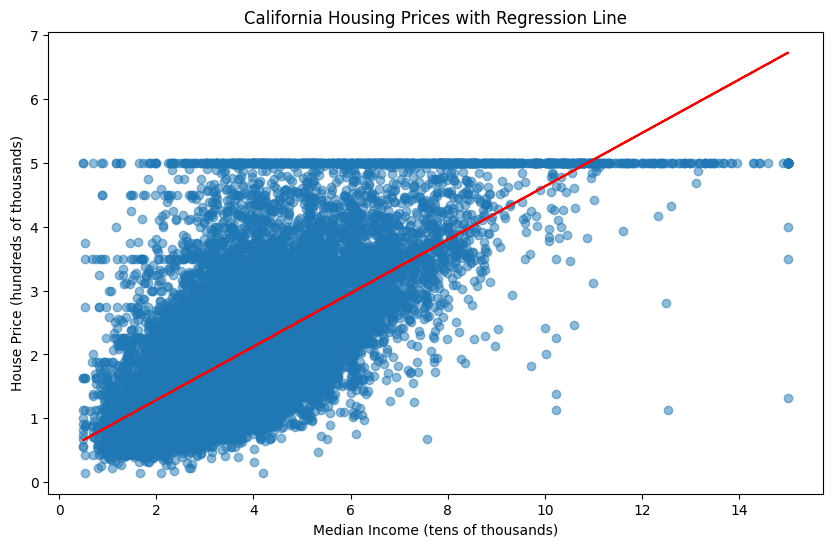

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, scaler.inverse_transform(X_scaled * theta_final[1] + theta_final[0].reshape(-1,1)), 'r')
plt.xlabel('Median Income (tens of thousands)')
plt.ylabel('House Price (hundreds of thousands)')
plt.title('California Housing Prices with Regression Line')
plt.show()